# Example: Weighted Von Mises KDE
This example shows you how to use the `vonmiseskde` package. It generates samples from two normal distributions, and models the original distribution using the Von Mises Kernel Density Estimator. Weights are optional. Note that the KDE automatically normalizes the input values to fall in the $[0, 2\pi]$ range.

In [1]:
# Add local modules folder to path
import sys
sys.path.append('../../')

In [2]:
# Standard imports
import math
import numpy as np
import matplotlib.pyplot as plt

# Local imports
from vonmiseskde import VonMisesKDE

## Generate samples
Simulate two Gaussian distributions and generate samples from the joint distribution

In [7]:
samples = np.concatenate([
    np.random.normal(-math.pi * 0.2, math.pi * 0.2, 10),
    np.random.normal(math.pi * 0.9, math.pi * 0.2, 10)
])

## Attach weights to samples
Optionally, one can attach weights to the samples. This alters the influence of samples on the modelled distribution.

In [8]:
# weights = []
weights = np.linspace(1,10,len(samples)) ** 2

## Apply Von Mises KDE
The KDE with the Von Mises kernel can now be applied to the input data.

In [9]:
# Kernel density estimator
kappa = 25
kde = VonMisesKDE(samples, weights=weights, kappa=kappa)

## Plot results

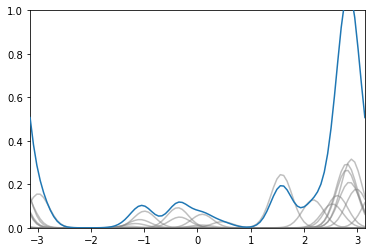

In [10]:
# Input for test points
test_x = np.linspace(-math.pi, math.pi, 100)

# Display individual distributions
for i in np.arange(0, len(samples)):
    sample = samples[i]
    test_y = kde.vonMisesPDF(test_x, sample)
    test_y = test_y / test_y.sum()
    
    if len(weights):
        test_y = test_y * weights[i] / np.sum(weights) * 20
    
    plt.plot(test_x, test_y, color='gray', alpha=0.5)

# Display posterior estimate
plt.plot(test_x, kde.evaluate(test_x), zorder=20)

plt.xlim(-math.pi, math.pi)
plt.ylim(0, 1)
plt.show()